# Лабораторная работа № 6
## Сети Кохонена

#### Выполнил: Цапков А.М.

In [2]:
import numpy as np
from minisom import MiniSom
from neupy.algorithms import SOFM, LVQ
import neurolab as nl
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

In [3]:
def DrawHex(x2, y2, xx, yy, umatrix, weights):    
    f = plt.figure(figsize=(15,15))
    ax = f.add_subplot()

    ax.set_aspect('equal')

    # iteratively add hexagons
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
            hex = RegularPolygon((xx[(i, j)], wy), 
                                 numVertices=6, 
                                 radius=0.95 / np.sqrt(3),
                                 facecolor=cm.Blues(umatrix[i, j]), 
                                 alpha=0.4, 
                                 edgecolor='gray')
            ax.add_patch(hex)

    markers = ['o', 'v', 'x', '*', 'D', 'H', 'P', 's']
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:cyan']
    for cnt, x in enumerate(x2):
        # getting the winner
        w = som.winner(x)
        # place a marker on the winning position for the sample xx
        wx, wy = som.convert_map_to_euclidean(w) 
        wy = wy * 2 / np.sqrt(3) * 3 / 4
        plt.plot(wx, wy, 
                 markers[y2[cnt]], 
                 markerfacecolor='None',
                 markeredgecolor=colors[y2[cnt]], 
                 markersize=12, 
                 markeredgewidth=2)

    xrange = np.arange(weights.shape[0])
    yrange = np.arange(weights.shape[1])
    plt.xticks(xrange-0.5, xrange)
    plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
    cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                                orientation='vertical', alpha=.4)
    cb1.ax.get_yaxis().labelpad = 16
    cb1.ax.set_ylabel('Distance from neurons in the neighbourhood',
                      rotation=270, fontsize=16)
    plt.gcf().add_axes(ax_cb)

    legend_elements = [Line2D([0], [0], marker='o', color='tab:blue', label='0',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='v', color='tab:orange', label='1',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='x', color='tab:green', label='2',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='*', color='tab:red', label='3',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='D', color='tab:purple', label='4',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='H', color='tab:brown', label='5',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='P', color='tab:pink', label='6',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                       Line2D([0], [0], marker='s', color='tab:cyan', label='7',
                       markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
    ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
              borderaxespad=0., ncol=8, fontsize=14)
    plt.show()

### Задание №1

Использовать *слой Кохонена* для выполнения кластеризации множества точек. Проверить качество разбиения.

In [4]:
x, y, centers = make_blobs(
    n_samples=80, cluster_std=0.1, n_features=2, 
    centers=8, center_box=(0, 1.5), 
    return_centers=True, random_state=84
)

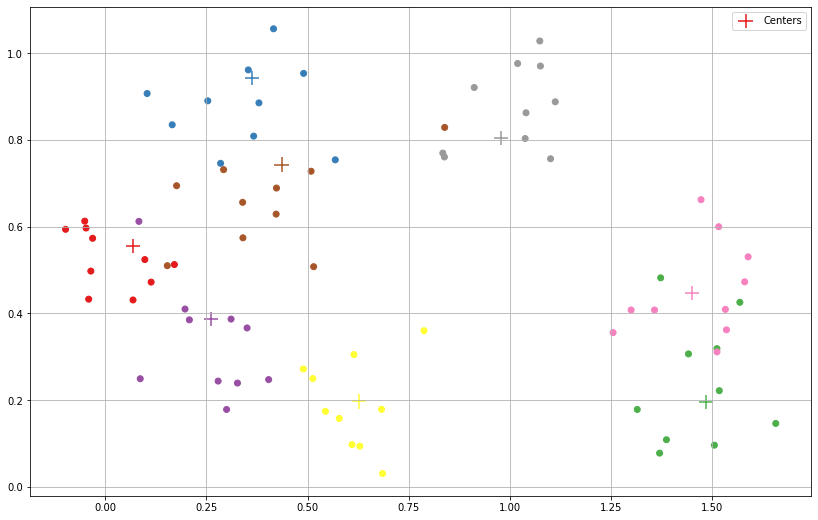

In [5]:
plt.figure(figsize=(14, 9))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set1')
plt.scatter(centers[:,0], centers[:, 1], c=range(8), cmap='Set1', marker='+', s=200, label="Centers")
plt.legend()
plt.grid(True)

Epoch: 100; Error: 13.25064839609018;
Epoch: 200; Error: 13.146009895299933;
Epoch: 300; Error: 13.141978133794737;
Epoch: 400; Error: 13.22142929484291;
Epoch: 500; Error: 13.221195838661727;
Epoch: 600; Error: 13.221146630113022;
Epoch: 700; Error: 13.221136390888288;
Epoch: 800; Error: 13.22113430484349;
Epoch: 900; Error: 13.221133888971803;
Epoch: 1000; Error: 13.221133807850617;
The maximum number of train epochs is reached


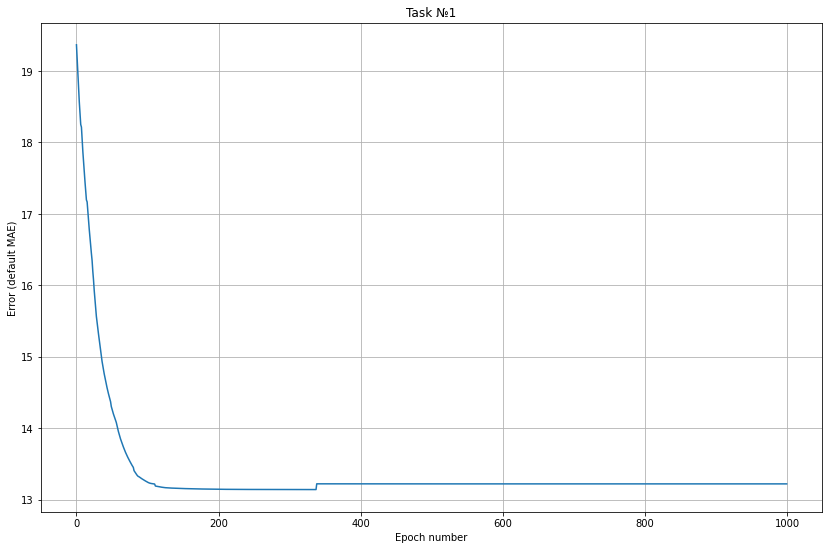

In [6]:
clusters = 8
competNet = nl.net.newc([[0.0, 2],[0.0, 2]], clusters)
error = competNet.train(x, epochs=1000, show=100)

plt.figure(figsize=(14, 9))
plt.title('Task №1')
plt.plot(error)
plt.grid()
plt.xlabel('Epoch number')
plt.ylabel('Error (default MAE)')
None

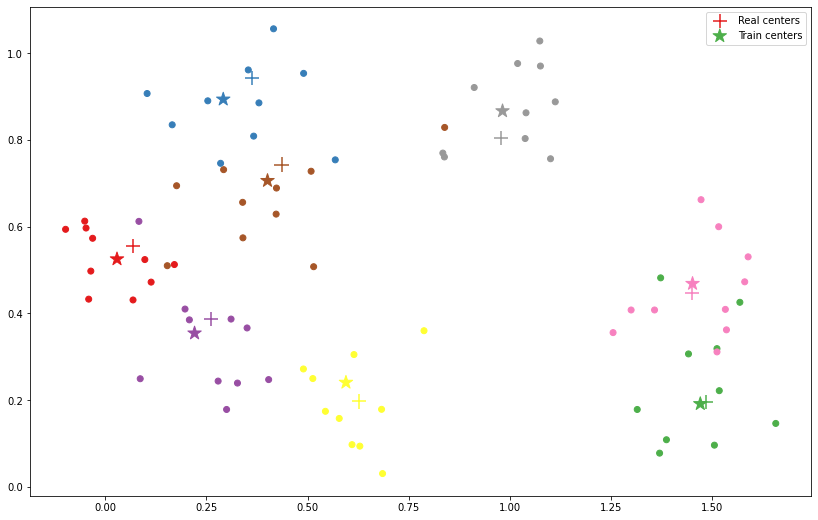

array([[1.47129497, 0.19112541],
       [1.45210721, 0.46839203],
       [0.59499671, 0.24042544],
       [0.29153464, 0.89345176],
       [0.22060864, 0.35403702],
       [0.40100757, 0.70573633],
       [0.98220614, 0.86646429],
       [0.02878511, 0.52498349]])

In [7]:
pred = competNet.sim(centers)
classPred_map = np.argmax(pred, axis=1)

def map_to_color(inp):
    out = []
    for a in inp:
        for i in range(len(classPred_map)):
            if classPred_map[i] == a:
                break
        out.append(i)
    return out


weightsAreCenter = competNet.layers[0].np['w']
pred = competNet.sim(weightsAreCenter)
pred_w_c = np.argmax(pred, axis=1)


plt.figure(figsize=(14, 9))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set1')
plt.scatter(centers[:,0], centers[:, 1], c=range(8), marker='+', s=200, label="Real centers", cmap='Set1')
plt.scatter(weightsAreCenter[:,0], weightsAreCenter[:,1], c=map_to_color(pred_w_c), marker='*', s=200, label="Train centers",  cmap='Set1')
plt.legend()
plt.show()

weightsAreCenter

Создадим случайным образом 5 точек  классифицируем их:

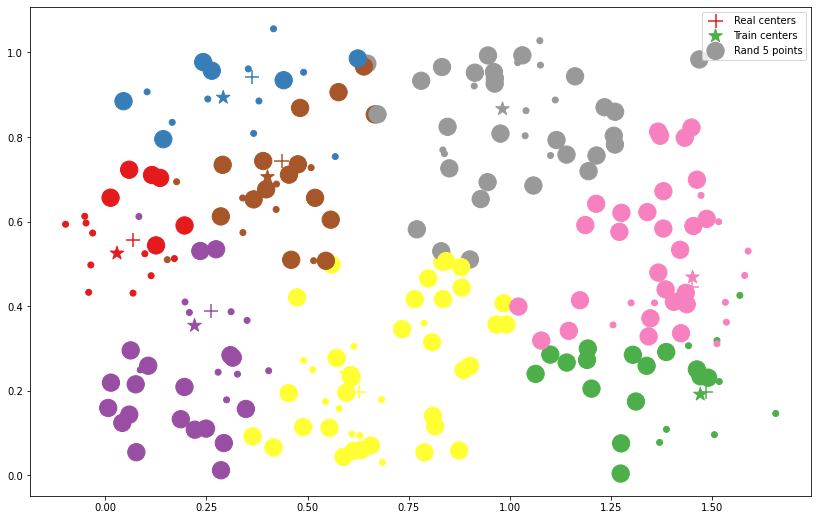

In [8]:
randPoints = np.array([[np.random.uniform(0, 1.5),
                        np.random.uniform(0, 1)] for _ in range(150)])

pred = competNet.sim(randPoints)
classPred = np.argmax(pred, axis=1)

plt.figure(figsize=(14, 9))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set1')
plt.scatter(centers[:,0], centers[:, 1], c=range(8), marker='+', s=200, label="Real centers", cmap='Set1')
plt.scatter(weightsAreCenter[:,0], weightsAreCenter[:,1], c=map_to_color(pred_w_c), marker='*', s=200, label="Train centers",  cmap='Set1')
plt.scatter(randPoints[:, 0], randPoints[:, 1], c=map_to_color(classPred),
            cmap='Set1', marker='o', s=300, label='Rand 5 points')
plt.legend()
plt.show()


### Задание №2

Нужно построить и обучить карту Кохонена размера 2x4 с гексагональной сеткой

Сгенерируем набор из  точек:

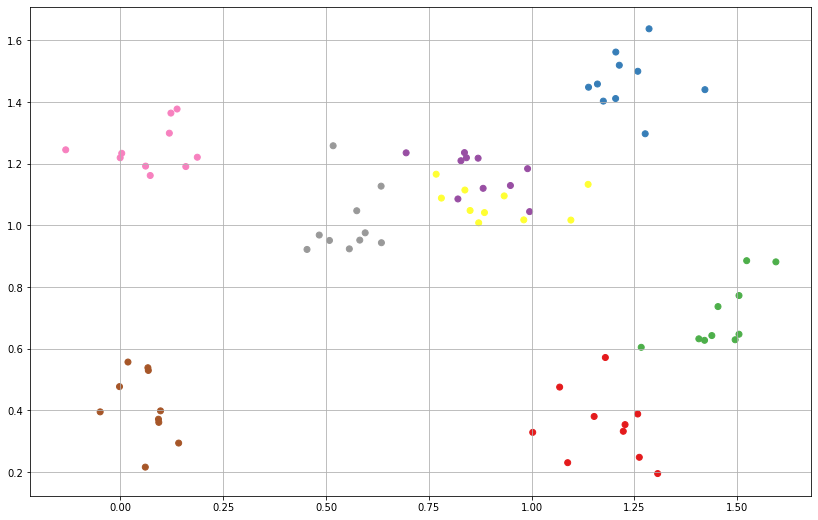

In [90]:
x2, y2 = make_blobs(n_samples=80, cluster_std=0.1, n_features=2,
                    centers=8, center_box=(0, 1.5), random_state=13)

plt.figure(figsize=(14, 9))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap='Set1')
plt.grid(True)

Обучим сеть:

In [103]:
epochs = 500
som = MiniSom(2, 4, x2.shape[1], sigma=0.66, learning_rate=0.8, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)
som.train(x2, epochs, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.10796972376079891


In [104]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

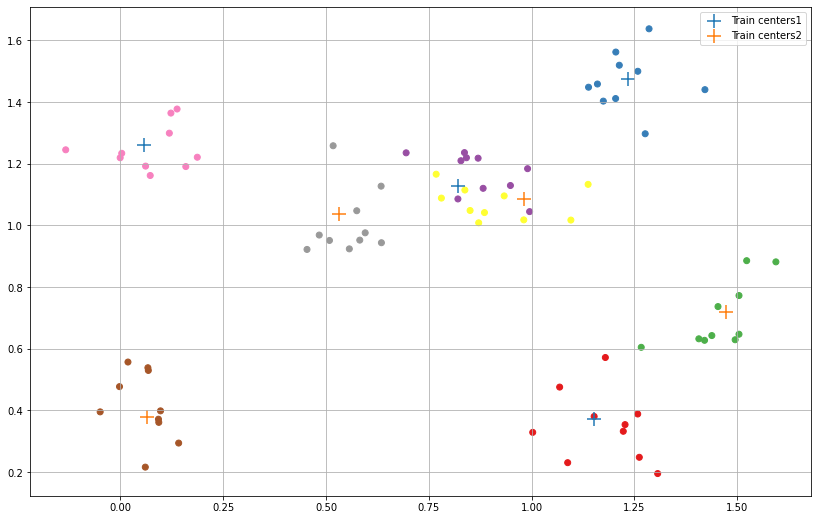

In [109]:
plt.figure(figsize=(14, 9))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, cmap='Set1')
plt.scatter(weights[0][:,0], weights[0][:,1], s=200 ,marker='+', label='Train centers1')
plt.scatter(weights[1][:,0], weights[1][:,1], s=200 ,marker='+', label='Train centers2')
plt.legend()
plt.grid(True)

Гексогональная сетка для обучающего множества.

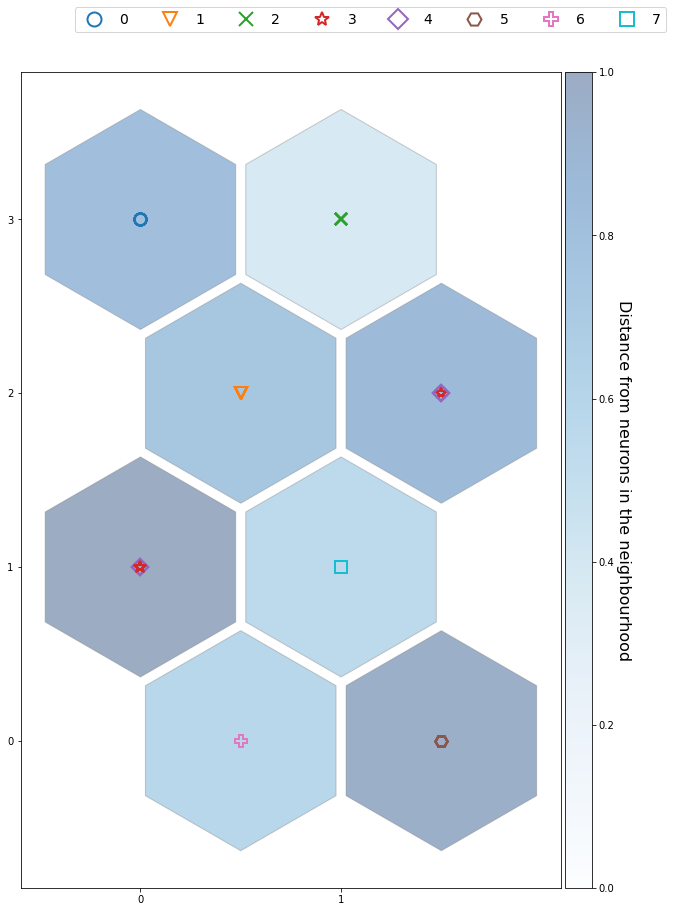

In [112]:
DrawHex(x2, y2, xx, yy, umatrix, weights)

Сгенерируем случайные точки и определим их кластеры:

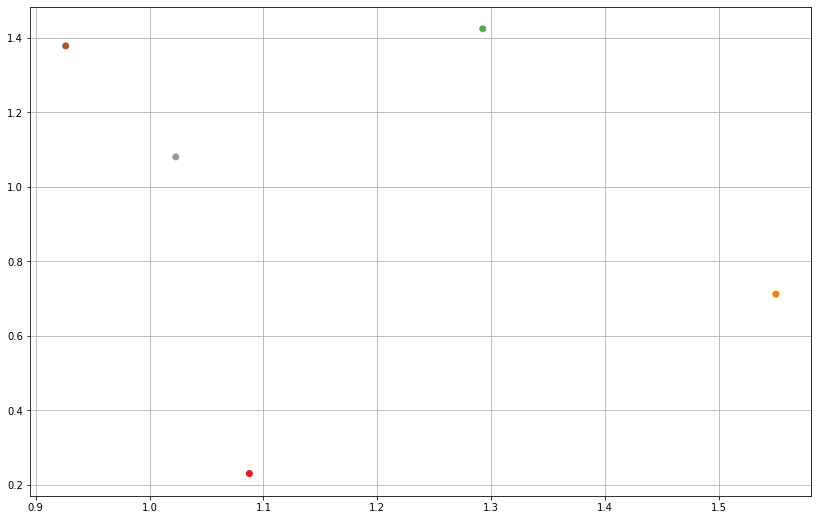

In [118]:
randx, randy = make_blobs(n_samples=5, cluster_std=0.1, n_features=2,
                    centers=8, center_box=(0, 1.5), random_state=13)

plt.figure(figsize=(14, 9))
plt.scatter(randx[:, 0], randx[:, 1], c=randy, cmap='Set1')
plt.grid(True)

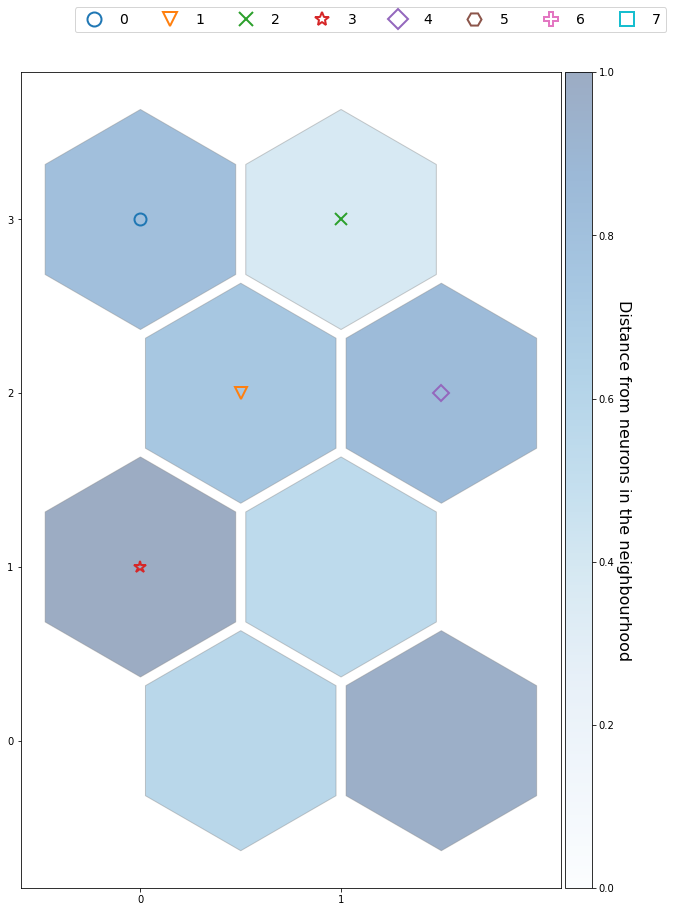

In [119]:
DrawHex(randx, randy, xx, yy, umatrix, weights)

### Задание №3

Использовать *карту Кохонена* для нахождения одного из решений задачи коммивояжера.

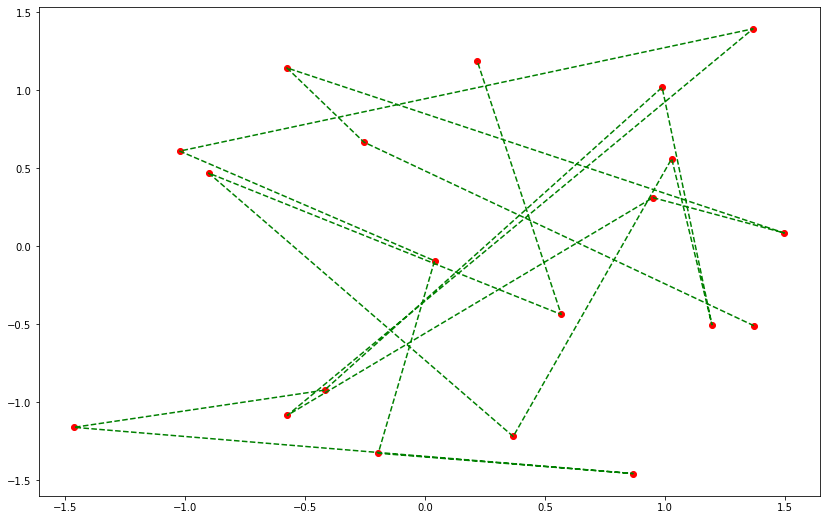

In [128]:
z = np.array([[np.random.uniform(-1.5, 1.5), np.random.uniform(-1.5, 1.5)] for _ in range(20)])

plt.figure(figsize=(14, 9))
plt.plot(z[:, 0], z[:, 1], '--', c='green')
plt.scatter(z[:, 0], z[:, 1], c='red')

Обучим сеть и посмотрим на полученный результат:

/usr/local/lib/python3.9/site-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


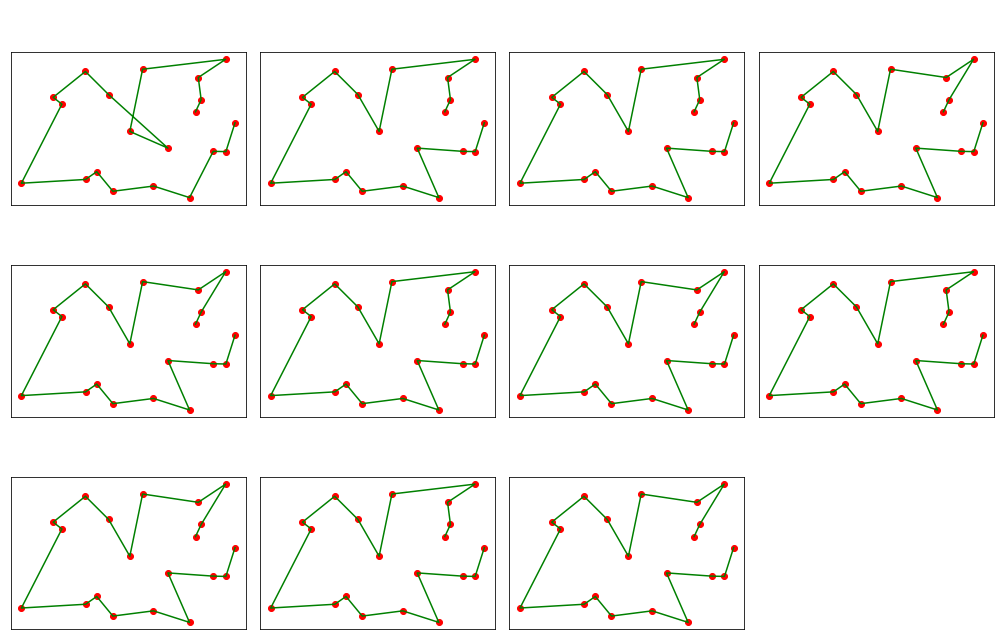

In [130]:
import math
def dist(x, y):
    return math.sqrt(((x - y)[0] ** 2 + (x - y)[1] ** 2))

np.random.RandomState(10)
neurons = 80

som = MiniSom(1, neurons, z.shape[1], sigma=8, learning_rate=0.4,
              neighborhood_function='gaussian', random_seed=0)
som.random_weights_init(z)

plt.figure(figsize=(14, 9))
for i, iterations in enumerate(range(100, 601, 50)):
    som.train(z, iterations, verbose=False, random_order=False)
    plt.subplot(3, 4, i+1)
    plt.scatter(z[:, 0], z[:, 1], c='red')
    visit_order = np.argsort([som.winner(p)[1] for p in z])
    #visit_order = np.concatenate((visit_order, [visit_order[0]]))
    length = 0
    for i in range(len(z) - 1):
        length += dist(z[visit_order][i], z[visit_order][i+1])
    plt.plot(z[visit_order][:,0], z[visit_order][:,1], c='green')
    plt.title("Epochs: {i};\nError: {e:.3f}\n Length: {l:.3f}".format(i=iterations, 
                                                    e=som.quantization_error(z), l=length), c='white')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

### Задание №4

Использовать *сеть векторного квантования, обучаемую с учителем (LVQ-сеть)*, для классификации точек в случае, когда классы не являются линейно разделимыми.

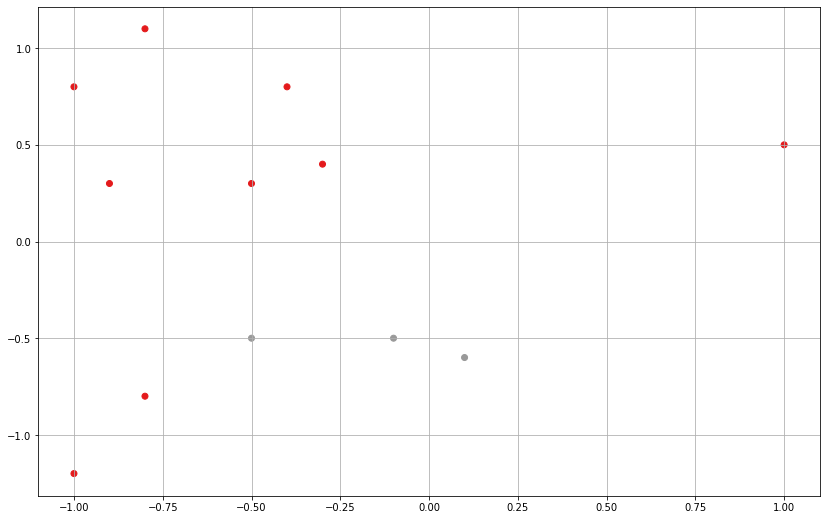

In [9]:
points = np.array([
    [-0.8, -1.0, 0.1, -0.4, 1, -0.3, -0.9, -0.5, -0.5, -1, -0.1, -0.8],
    [1.1, -1.2, -0.6, 0.8, 0.5, 0.4, 0.3, 0.3, -0.5, 0.8, -0.5, -0.8]
])

target = np.array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])
pointsT = points.T

plt.figure(figsize=(14, 9))
plt.scatter(pointsT[:, 0], pointsT[:, 1], c=target, cmap='Set1')
plt.grid(True)

In [16]:
lvqnet = LVQ(n_inputs=2, n_subclasses=4, n_classes=2, step=0.1)
lvqnet.train(pointsT, target, epochs=1000)

In [17]:
xx, yy = np.meshgrid(np.arange(-1.5, 1.51, 0.1), np.arange(-1.5, 1.51, 0.1))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
sample = np.concatenate((xx, yy), axis=1)

pred = lvqnet.predict(sample)

Полученная сетка:

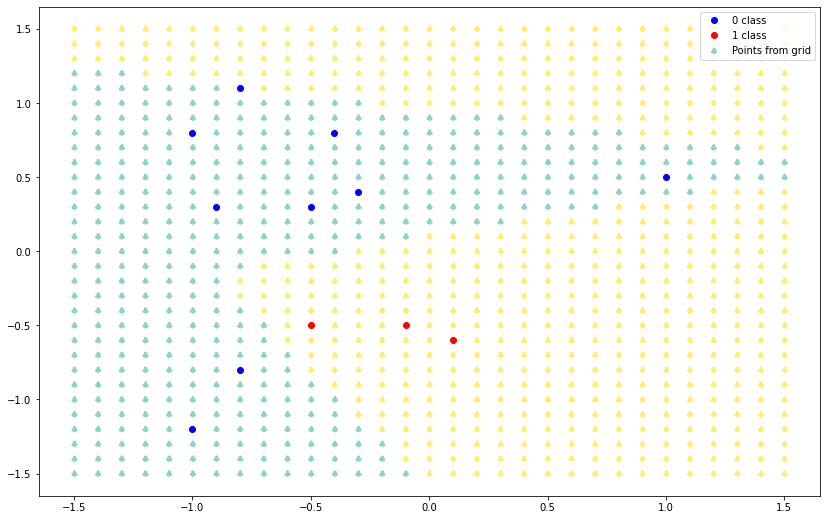

In [18]:
plt.figure(figsize=(14, 9))

plt.scatter(sample[:, 0], sample[:, 1], c=pred,
            cmap='Set3', marker=r'$\clubsuit$', label='Points from grid')
plt.plot([pointsT[i][0] for i in range(12) if target[i] == 0], 
         [pointsT[i][1] for i in range(12) if target[i] == 0], 'bo', label='0 class')
plt.plot([pointsT[i][0] for i in range(12) if target[i] == 1], 
         [pointsT[i][1] for i in range(12) if target[i] == 1], 'ro', label='1 class');
plt.legend()
plt.show()

# Выводы:
Слой Кохонена не так интересен, как карты Кохонена! Они интересны мне с точки зрения подхода к обучению и тех результатах которые мы получаем, в частности какую-то простраственную визуализацию, или же, как в лабораторной работе "близость" точек и решение задачи Комивояжора.